<a href="https://colab.research.google.com/github/nish700/Natural-Language-Processing/blob/main/Analysis_of_the_Consumer_Complaints_Data_using_NLP_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Natural Language Processing (NLP) is a subfield of artificial intelligence and computational linguistics that focuses on enabling computers to understand, interpret, and generate human language. It involves the development of algorithms and techniques that enable machines to process, analyze, and derive meaning from natural language data, such as text and speech.

NLP encompasses a wide range of tasks, including:

- Text Classification: Categorizing text into predefined categories or labels.
- Sentiment Analysis: Determining the sentiment or opinion expressed in a piece of text, such as positive, negative, or neutral.
- Named Entity Recognition: Identifying and classifying named entities, such as names of people, organizations, locations, or dates, within text.
- Machine Translation: Automatically translating text from one language to another.
- Question Answering: Providing accurate and relevant answers to user questions based on textual data.
- Text Summarization: Generating concise summaries of longer text documents.
- Language Generation: Creating human-like text, such as chatbot responses or automated article writing.

**


Data Source: https://catalog.data.gov/dataset/consumer-complaint-database

# Using NLTK

NLTK (Natural Language Toolkit) is a popular Python library for natural language processing (NLP) tasks. It provides a wide range of tools, resources, and algorithms to work with human language data.

Here are some key features and functionalities of NLTK:

- Tokenization: NLTK offers various tokenization methods to split text into individual words or sentences. It includes options for word tokenization, sentence tokenization, and regex-based tokenization.

- Part-of-Speech (POS) Tagging: NLTK provides pre-trained models and algorithms for POS tagging, which assigns grammatical tags to words in a sentence, such as noun, verb, adjective, etc. These tags help in understanding the syntactic structure and meaning of text.

- Named Entity Recognition (NER): NLTK supports NER, which involves identifying and classifying named entities, such as names of people, organizations, locations, and dates, within text data.

- Sentiment Analysis: NLTK includes sentiment analysis capabilities, allowing you to analyze and determine the sentiment or opinion expressed in a piece of text, such as positive, negative, or neutral.

- WordNet: NLTK integrates WordNet, a lexical database, which provides access to synonyms, antonyms, definitions, and semantic relationships between words. It allows you to explore word meanings and relationships.

- Stemming and Lemmatization: NLTK includes algorithms for stemming and lemmatization, which reduce words to their base or root forms. This can be useful for tasks like information retrieval and text normalization.

- Corpus and Language Resources: NLTK provides a wide range of corpora and language resources for various languages, including text collections, lexical resources, and grammars. These resources can be used for training and evaluating models or conducting research.

- Text Classification: NLTK supports text classification tasks, allowing you to train and evaluate classifiers for tasks like sentiment analysis, document categorization, or spam detection.

- Language Processing Pipelines: NLTK provides a flexible framework for building language processing pipelines, where you can chain together multiple processing steps to perform complex NLP tasks.

## Import the dependancies

In [ ]:
import pandas as pd

from collections import Counter
import operator

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

from nltk.tokenize import word_tokenize
nltk.download('punkt')
SENT_DETECTOR = nltk.data.load('tokenizers/punkt/english.pickle')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from textblob import TextBlob
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Load the Dataset

### importing the file from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Datasets/NLP/consumer_complaints_data.zip

Archive:  /content/drive/MyDrive/Datasets/NLP/consumer_complaints_data.zip
  inflating: consumer_complaints_data/consumer_complaints.csv  


In [ ]:
full_data = pd.read_csv('/content/consumer_complaints_data/consumer_complaints.csv')

<ipython-input-4-b8fa49407c7d>:1: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('/content/consumer_complaints_data/consumer_complaints.csv')


In [ ]:
full_data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
full_data.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275


## Data Preprocessing

Taking only the requisite columns

In [ ]:
data = full_data[['Consumer complaint narrative','Product']]

In [ ]:
data.head(5)

,Consumer complaint narrative,Product
0,NaN,Checking or savings account
1,NaN,Checking or savings account
2,NaN,Debt collection
3,NaN,"Credit reporting, credit repair services, or o..."
4,NaN,Checking or savings account


### Removing the null values

In [ ]:
data.dropna(inplace=True)

<ipython-input-9-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
data.head()

,Consumer complaint narrative,Product
29904,The Summer of XX/XX/2018 I was denied a mortga...,"Credit reporting, credit repair services, or o..."
30629,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30735,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30795,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30807,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."


In [ ]:
data.columns = ['X','y']

In [ ]:
data['X'].iloc[1]

'There are many mistakes appear in my report without my understanding.'

### Creating the stopwords set

In [ ]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.add('xxxx')
custom = list(stopwords_set) + list(punctuation) + ['``', "'s", "...", "n't",'xxxxxxxx']

In [ ]:
first_five_complaints = data.iloc[:5]
first_five_complaints

,X,y
29904,The Summer of XX/XX/2018 I was denied a mortga...,"Credit reporting, credit repair services, or o..."
30629,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30735,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30795,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30807,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."


In [ ]:
print(data.iloc[:5])

                                                       X  \
29904  The Summer of XX/XX/2018 I was denied a mortga...   
30629  There are many mistakes appear in my report wi...   
30735  There are many mistakes appear in my report wi...   
30795  There are many mistakes appear in my report wi...   
30807  There are many mistakes appear in my report wi...   

                                                       y  
29904  Credit reporting, credit repair services, or o...  
30629  Credit reporting, credit repair services, or o...  
30735  Credit reporting, credit repair services, or o...  
30795  Credit reporting, credit repair services, or o...  
30807  Credit reporting, credit repair services, or o...  


### Creating Bag of Words

In [ ]:
BoW = first_five_complaints['X'].str.lower()
BoW

29904    the summer of xx/xx/2018 i was denied a mortga...
30629    there are many mistakes appear in my report wi...
30735    there are many mistakes appear in my report wi...
30795    there are many mistakes appear in my report wi...
30807    there are many mistakes appear in my report wi...
Name: X, dtype: object

### Tokenize the Bag of words

In [ ]:
BoW = BoW.apply(lambda x : word_tokenize(x))
# BoW

### Removing the stopwords

In [ ]:
# flatten
BoW = [item for sublist in BoW for item in sublist]
# BoW

In [ ]:
BoW = [x for x in BoW if x not in custom]

### Lemmatize the Bag Of Words

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
BoW = [lemmatizer.lemmatize(i) for i in BoW]

### Count of Words

In [ ]:
BoW_dict = Counter(BoW)

### Sorting Bag of Words on Word Frequency

In [ ]:
sorted_d = sorted(BoW_dict.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
sorted_d

[('credit', 5),
 ('letter', 4),
 ('debt', 4),
 ('many', 4),
 ('mistake', 4),
 ('appear', 4),
 ('report', 4),
 ('without', 4),
 ('understanding', 4),
 ('bureau', 3),
 ('proof', 3),
 ('xx/xx/2018', 2),
 ('card', 2),
 ('responded', 2),
 ('verified', 2),
 ('sent', 2),
 ('summer', 1),
 ('denied', 1),
 ('mortgage', 1),
 ('loan', 1),
 ('due', 1),
 ('charge', 1),
 ('mailed', 1),
 ('account', 1),
 ('validation', 1),
 ('disputed', 1),
 ('company', 1),
 ('several', 1),
 ('time', 1),
 ('showed', 1),
 ('requested', 1),
 ('still', 1),
 ('since', 1),
 ('asked', 1),
 ('show', 1),
 ('bill', 1),
 ('could', 1),
 ('fabricated', 1),
 ('really', 1),
 ('need', 1),
 ('know', 1),
 ('shown', 1),
 ('multiple', 1),
 ('dispute', 1),
 ('certified', 1)]

In [ ]:
BoW_joined = " ".join(BoW)

### Making a Text Blob 

In [ ]:
blob = TextBlob(BoW_joined)

## Identifying the names entity

In [ ]:
blob.tags[:10]

[('summer', 'NN'),
 ('xx/xx/2018', 'NNP'),
 ('denied', 'VBD'),
 ('mortgage', 'NN'),
 ('loan', 'NN'),
 ('due', 'JJ'),
 ('charge', 'NN'),
 ('credit', 'NN'),
 ('card', 'NN'),
 ('mailed', 'VBD')]

In [ ]:
tags = blob.tags

In [ ]:
len(tags)

82

In [ ]:
tags[-2][0]

'without'

### Identifying the Nouns

In [ ]:
nouns = [tags[x][0] for x in range(len(tags)) if tags[x][1]=='NN' ]

In [ ]:
len(nouns)

35

In [ ]:
top_10 = sorted_d[:10]

In [ ]:
top_words = [x[0] for x in top_10]

In [ ]:
top_words

['credit',
 'letter',
 'debt',
 'many',
 'mistake',
 'appear',
 'report',
 'without',
 'understanding',
 'bureau']

In [ ]:
top_nouns = [x for x in top_words if x in nouns]

In [ ]:
top_nouns

['credit', 'letter', 'debt', 'report', 'bureau']

# Latent Symentic Analysis

Latent Semantic Analysis a technique used in Natural Language Processing (NLP) to uncover hidden semantic relationships between words and documents. It is a mathematical method that represents words and documents as vectors in a high-dimensional space and captures the latent (hidden) meaning or semantic similarity between them.

LSA can be applied to various NLP tasks, including document classification, information retrieval, and text summarization. By representing text data in a lower-dimensional semantic space, LSA enables similarity comparisons, clustering, and the identification of related documents or words. It has been particularly useful for tasks where understanding the semantic meaning of words and documents is crucial.

### Importing the dependencies

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
sklearn.__version__

'1.2.2'

### loading the dataset

In [ ]:
first_five_complaints

,X,y
29904,The Summer of XX/XX/2018 I was denied a mortga...,"Credit reporting, credit repair services, or o..."
30629,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30735,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30795,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."
30807,There are many mistakes appear in my report wi...,"Credit reporting, credit repair services, or o..."


### Data Preprocessing

In [ ]:
all_text = first_five_complaints['X']

In [ ]:
all_text = pd.DataFrame(all_text)

In [ ]:
all_text.columns = ['Text']

In [ ]:
all_text['Text'] = all_text['Text'].str.lower()

In [ ]:
all_text

,Text
29904,the summer of xx/xx/2018 i was denied a mortga...
30629,there are many mistakes appear in my report wi...
30735,there are many mistakes appear in my report wi...
30795,there are many mistakes appear in my report wi...
30807,there are many mistakes appear in my report wi...


### Tokenize the text

In [ ]:
all_text_tokenizer = all_text['Text'].apply(lambda x : word_tokenize(x))

In [ ]:
all_text_tokenizer

29904    [the, summer, of, xx/xx/2018, i, was, denied, ...
30629    [there, are, many, mistakes, appear, in, my, r...
30735    [there, are, many, mistakes, appear, in, my, r...
30795    [there, are, many, mistakes, appear, in, my, r...
30807    [there, are, many, mistakes, appear, in, my, r...
Name: Text, dtype: object

In [ ]:
all_text_bow = [item for sublist in all_text_tokenizer for item in sublist]

### Remove stopwords and create Bag of Words

In [ ]:
all_text_bag = [x for x in all_text_bow if x not in custom] 

### Vectorize the words

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
vector = tfidf_vectorizer.fit_transform(all_text_bag)

In [ ]:
X = vector.toarray()

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
1,0.447214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.894427
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
78,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
79,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
80,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Initialize SVD and fit to the data

In [ ]:
svd_model = TruncatedSVD(n_components=5, algorithm = 'randomized',n_iter=100, random_state= 10)

In [ ]:
svd_model.fit(X)

TruncatedSVD(n_components=5, n_iter=100, random_state=10)

In [ ]:
svd_model.singular_values_

array([2.23606798, 2.        , 2.        , 2.        , 2.        ])

In [ ]:
print('No. of topics choosen are ', len(svd_model.components_))

No. of topics choosen are  5


In [ ]:
svd_model.components_

array([[-4.65115410e-26,  6.59304533e-19,  1.00370624e-25,
         2.97381987e-19, -2.75459890e-27,  7.64732724e-27,
        -3.97594540e-19,  1.63630161e-19,  6.12881464e-19,
         1.00000000e+00,  1.94290780e-25,  4.02214488e-19,
         2.01375238e-19,  2.82542708e-20, -3.27286189e-19,
         1.68605009e-19, -2.21016701e-19, -2.64182111e-27,
        -2.24433841e-19,  2.32100434e-20, -5.29965225e-25,
        -2.83474421e-19, -1.29689859e-19,  1.44649938e-19,
         2.57612853e-28,  7.81394144e-20, -1.13348582e-25,
        -4.73955366e-19,  2.52579685e-26, -1.70838552e-26,
         5.29969216e-20,  2.61925307e-19,  1.29749425e-19,
        -1.25374893e-20,  3.43832164e-26,  1.60343717e-19,
        -2.26089259e-26, -9.30230819e-26],
       [ 1.33824048e-16, -3.12283397e-16, -1.02986017e-01,
        -1.16263150e-16, -1.34987482e-14,  9.14385967e-17,
         1.42967215e-16, -5.88382035e-17, -2.20380180e-16,
        -4.28654547e-25,  8.34734180e-01, -1.76085340e-16,
        -7.24

### Clustering the words into topics

In [ ]:
terms = tfidf_vectorizer.get_feature_names_out()
topics = []

for i , comp in enumerate(svd_model.components_):
  terms_comp = zip(terms, comp)
  sorted_terms = sorted(terms_comp, key = lambda x:x[1], reverse= True)[:7]
  topics.append("Topic " + str(i) + ': ')
  for t in sorted_terms:
    topics.append(t[0])
final_topics_list = [topics[i:i+8] for i in range(0,len(topics),8)]
for x in final_topics_list:
  print(x)


['Topic 0: ', 'credit', 'account', 'company', 'denied', 'asked', 'shown', 'disputed']
['Topic 1: ', 'debt', 'understanding', 'proof', 'xx', 'requested', 'sent', 'certified']
['Topic 2: ', 'appear', 'report', 'understanding', 'debt', 'mistakes', 'proof', 'sent']
['Topic 3: ', 'report', 'understanding', 'verified', 'bureaus', 'account', 'denied', 'company']
['Topic 4: ', 'mistakes', 'debt', 'report', 'responded', 'card', 'requested', 'certified']


# Gensim

Gensim is a popular open-source Python library for natural language processing (NLP) tasks.It provides efficient and scalable implementations of various algorithms and models used in NLP, with a particular focus on topic modeling and document similarity analysis.

Here are some key features and functionalities of Gensim:

- Topic Modeling: Gensim offers an implementation of Latent Dirichlet Allocation (LDA), a widely used technique for uncovering latent topics in a collection of documents. It allows you to train LDA models on your own text data and extract topics along with their associated word distributions.

- Word Embeddings: Gensim provides support for training and using word embeddings, which are dense vector representations of words that capture semantic similarities. It includes popular algorithms like Word2Vec and FastText, allowing you to train your own word embeddings or load pre-trained models.

- Document Similarity: Gensim enables you to measure similarity between documents using techniques such as cosine similarity and the Word Mover's Distance (WMD). These methods allow you to quantify the similarity between two pieces of text based on their semantic content.

- Text Preprocessing: Gensim provides utilities for common text preprocessing tasks, such as tokenization, stemming, lemmatization, and stop-word removal. These preprocessing steps are essential for cleaning and preparing text data before applying various NLP algorithms.

- Streaming and Memory Efficiency: Gensim is designed to handle large text corpora efficiently by using streaming and incremental processing methods. It allows you to process and train models on texts that may not fit entirely into memory.

- Integration with Other Libraries: Gensim integrates well with other popular NLP libraries and tools. It can read and write data in various formats, including plain text, XML, and corpora in the well-known "Bag-of-Words" format. It also supports interoperability with libraries such as NLTK, scikit-learn, and spaCy.

### Importing the dependencies

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from gensim import corpora
from gensim.models.lsimodel import LsiModel

import string
from pprint import pprint

### Data Preprocessing 

In [ ]:
stop = stopwords_set
exclude = set(string.punctuation)

In [ ]:
lemma = WordNetLemmatizer()

#### Cleaning the doc

In [ ]:
def clean(doc):
  stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
  punc_free = "".join(x for x in stop_free if x not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

In [ ]:
list_of_docs = data['X'].tolist()

In [ ]:
doc_clean = [clean(doc).split() for doc in list_of_docs]

In [ ]:
doc_clean[:2]

[['summer',
  'xxxx2018',
  'denied',
  'mortgage',
  'loan',
  'due',
  'charge',
  'credit',
  'card',
  'mailed',
  'account',
  'validation',
  'letter',
  'disputed',
  'debt',
  'credit',
  'bureau',
  'credit',
  'card',
  'company',
  'several',
  'time',
  'credit',
  'bureau',
  'responded',
  'debt',
  'verified',
  'showed',
  'proof',
  'requested',
  'still',
  'responded',
  'letter',
  'since',
  'xxxx2018',
  'asked',
  'credit',
  'bureau',
  'show',
  'verified',
  'debt',
  'sent',
  'proof',
  'debt',
  'bill',
  'could',
  'fabricated',
  'really',
  'need',
  'know',
  'shown',
  'proof',
  'multiple',
  'dispute',
  'certified',
  'letter',
  'letter',
  'sent'],
 ['many', 'mistake', 'appear', 'report', 'without', 'understanding']]

### Creating the document corpus

In [ ]:
dictionary = corpora.Dictionary(doc_clean)

In [ ]:
dictionary

### Creating the doc term matrix

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

### Topic modelling using LSI model

In [ ]:
lsimodel = LsiModel(corpus= doc_term_matrix , num_topics= 5 , id2word= dictionary)

In [ ]:
pprint(lsimodel.print_topics())

[(0,
  '0.380*"xxxx" + 0.350*"xxxxxxxx" + 0.310*"account" + 0.264*"credit" + '
  '0.254*"payment" + 0.184*"loan" + 0.156*"would" + 0.121*"bank" + '
  '0.120*"time" + 0.116*"report"'),
 (1,
  '-0.606*"xxxxxxxx" + 0.389*"account" + 0.369*"credit" + -0.323*"xxxx" + '
  '0.181*"report" + -0.179*"loan" + 0.142*"information" + -0.120*"inquiry" + '
  '0.103*"reporting" + 0.097*"debt"'),
 (2,
  '0.486*"xxxx" + -0.426*"payment" + -0.397*"loan" + 0.244*"credit" + '
  '0.177*"xxxxxxxx" + 0.158*"report" + -0.154*"would" + 0.134*"inquiry" + '
  '0.121*"usd" + -0.116*"told"'),
 (3,
  '-0.631*"xxxx" + 0.630*"xxxxxxxx" + 0.207*"account" + -0.207*"loan" + '
  '0.170*"inquiry" + 0.132*"credit" + -0.125*"usd" + 0.068*"date" + '
  '-0.067*"mortgage" + 0.062*"report"'),
 (4,
  '0.444*"account" + -0.407*"loan" + -0.373*"consumer" + -0.281*"information" '
  '+ -0.189*"credit" + 0.185*"bank" + -0.177*"agency" + -0.176*"reporting" + '
  '-0.169*"report" + 0.149*"xxxx"')]


# LDA model using Gensim

LDA, short for Latent Dirichlet Allocation, is a widely used probabilistic model in the field of Natural Language Processing (NLP) for topic modeling. It is designed to uncover latent (hidden) topics within a collection of documents and determine how these topics are distributed across the documents.

### Importing the dependancies

In [ ]:
from gensim.models.ldamodel import LdaModel

### Topic modeling

In [ ]:
ldamodel = LdaModel(corpus = doc_term_matrix , num_topics = 5, id2word= dictionary)

In [ ]:
pprint(ldamodel.print_topics())

[(0,
  '0.030*"loan" + 0.022*"payment" + 0.017*"mortgage" + 0.016*"xxxx" + '
  '0.009*"home" + 0.009*"would" + 0.009*"time" + 0.008*"month" + 0.008*"year" '
  '+ 0.007*"xxxxxxxx"'),
 (1,
  '0.021*"account" + 0.018*"bank" + 0.014*"card" + 0.013*"would" + '
  '0.012*"told" + 0.012*"call" + 0.012*"xxxx" + 0.010*"called" + 0.009*"nt" + '
  '0.008*"fee"'),
 (2,
  '0.026*"xxxx" + 0.017*"information" + 0.011*"consumer" + 0.010*"law" + '
  '0.010*"request" + 0.009*"complaint" + 0.008*"account" + 0.008*"debt" + '
  '0.008*"document" + 0.007*"provide"'),
 (3,
  '0.030*"debt" + 0.029*"credit" + 0.022*"report" + 0.018*"collection" + '
  '0.018*"xxxx" + 0.016*"company" + 0.015*"account" + 0.012*"information" + '
  '0.012*"letter" + 0.010*"number"'),
 (4,
  '0.097*"credit" + 0.050*"account" + 0.043*"payment" + 0.032*"xxxx" + '
  '0.028*"xxxxxxxx" + 0.028*"report" + 0.022*"late" + 0.021*"balance" + '
  '0.016*"paid" + 0.015*"due"')]


Training the model for different number of iterations or epochs or passes. It controls how often we repeat a particular loop over each document. It is important to set the number of “passes” and “iterations” high enough.

In [ ]:
ldamodel_2 = LdaModel(corpus = doc_term_matrix , num_topics = 5, id2word= dictionary, passes=10)

In [ ]:
pprint(ldamodel_2.print_topics())

[(0,
  '0.043*"debt" + 0.025*"xxxx" + 0.016*"collection" + 0.015*"letter" + '
  '0.014*"information" + 0.009*"law" + 0.009*"agency" + 0.008*"sent" + '
  '0.008*"company" + 0.008*"court"'),
 (1,
  '0.019*"call" + 0.016*"nt" + 0.016*"told" + 0.014*"would" + 0.014*"called" + '
  '0.012*"xxxx" + 0.012*"time" + 0.011*"get" + 0.011*"said" + 0.011*"phone"'),
 (2,
  '0.040*"account" + 0.032*"bank" + 0.026*"card" + 0.014*"xxxx" + 0.013*"fee" '
  '+ 0.012*"charge" + 0.011*"check" + 0.010*"credit" + 0.009*"would" + '
  '0.009*"chase"'),
 (3,
  '0.036*"loan" + 0.035*"payment" + 0.020*"mortgage" + 0.018*"xxxx" + '
  '0.010*"xxxxxxxx" + 0.010*"home" + 0.009*"month" + 0.009*"interest" + '
  '0.008*"modification" + 0.008*"would"'),
 (4,
  '0.098*"credit" + 0.054*"report" + 0.044*"account" + 0.024*"xxxx" + '
  '0.017*"reporting" + 0.016*"information" + 0.011*"xxxxxxxx" + 0.011*"bureau" '
  '+ 0.011*"removed" + 0.010*"reported"')]


## Evaluating the LDA model

#### Using Log Perplexity

In [ ]:
perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
perplexity_lda

-7.263813216641042

#### Using Model Coherence

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
coherence_lda_model = CoherenceModel(model = ldamodel, texts= doc_clean, dictionary= dictionary , coherence='c_v')

In [ ]:
coherence_lda = coherence_lda_model.get_coherence()
coherence_lda

0.41272417710764947

# Visualizing topic distribution

##Installing the dependencies

In [ ]:
# !pip install pyLDAvis
## comment out when pyLDAvis library is installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


## Importing the libraries

In [86]:
import pyLDAvis
import pyLDAvis.gensim

## Initializing the Vis notebook

In [87]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Generating the Visualization

In [88]:
vis = pyLDAvis.gensim.prepare(topic_model = ldamodel, corpus = doc_term_matrix , dictionary = dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.148114 -0.047328       1        1  30.750460
0     -0.150219 -0.056502       2        1  26.677820
3      0.004059 -0.037467       3        1  17.077065
2      0.239705 -0.124535       4        1  13.719070
4      0.054569  0.265832       5        1  11.775585, topic_info=        Term           Freq          Total Category  logprob  loglift
9     credit  640299.000000  640299.000000  Default  30.0000  30.0000
253  payment  427875.000000  427875.000000  Default  29.0000  29.0000
0    account  563566.000000  563566.000000  Default  28.0000  28.0000
18      loan  287942.000000  287942.000000  Default  27.0000  27.0000
42    report  267975.000000  267975.000000  Default  26.0000  26.0000
..       ...            ...            ...      ...      ...      ...
67    remove   20915.109382   47382.554884   Topic5  -5.3030   1.3214
102      day   31861.711145  172424.454678   Topic5  -4.8821   0.4506
573   amount   26981.986286  120695.026085   Topic5  -5.0483   0.6410
370    month   27604.228365  157113.924667   Topic5  -5.0255   0.4001
6     charge   24105.781585  103987.950820   Topic5  -5.1610   0.6773

[436 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
161       1  0.077464    000
161       2  0.021939    000
161       3  0.001083    000
161       5  0.899369    000
3495      4  0.999323  1692g
...     ...       ...    ...
306       1  0.142255   year
306       2  0.501065   year
306       3  0.261199   year
306       4  0.000139   year
306       5  0.095340   year

[983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

## Determing appropriate number of topics

In [90]:
import gensim
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pyplot as plt
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        Lda = gensim.models.ldamodel.LdaModel
        model = Lda(doc_term_matrix, num_topics, id2word = dictionary, passes=1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=doc_term_matrix, texts=doc_clean, start=2, limit=40, step=6)


In [ ]:
import seaborn as sns

limit=40; start=2; step=6;
x = range(start, limit, step)

# Setting the plotting area
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(x, coherence_values)

# Labelling the axes
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence vs Number of Topics")
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Coherence score should always be maximized

### Topic modelling

In [ ]:
optimal_model = model_list[-2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

## Cluster the document on basis of topics

In [ ]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_clean):
    
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.Series([int(topic_num), round(prop_topic,4), topic_keywords])], ignore_index=True)
            else:
                break
    # sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Finding the dominant topic in each sentence
df_dominant_topic.head(10)

## Generating a Word Cloud

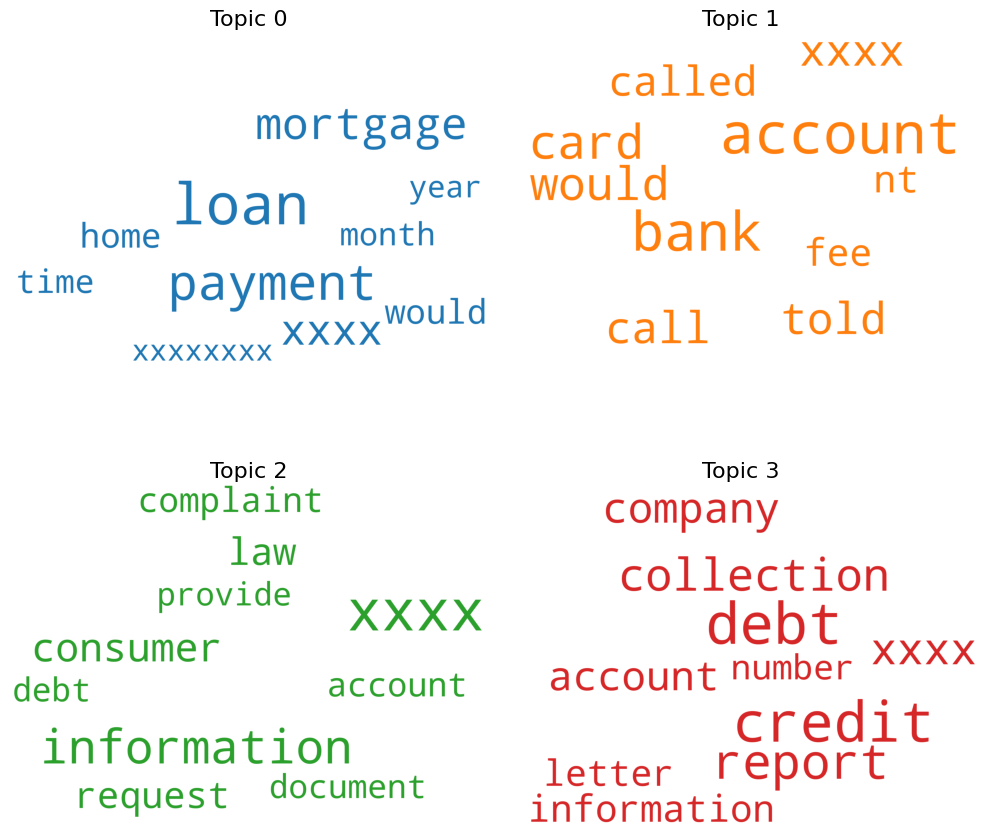

In [93]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
# fig.savefig('../images/word_cloud.png')
plt.show()

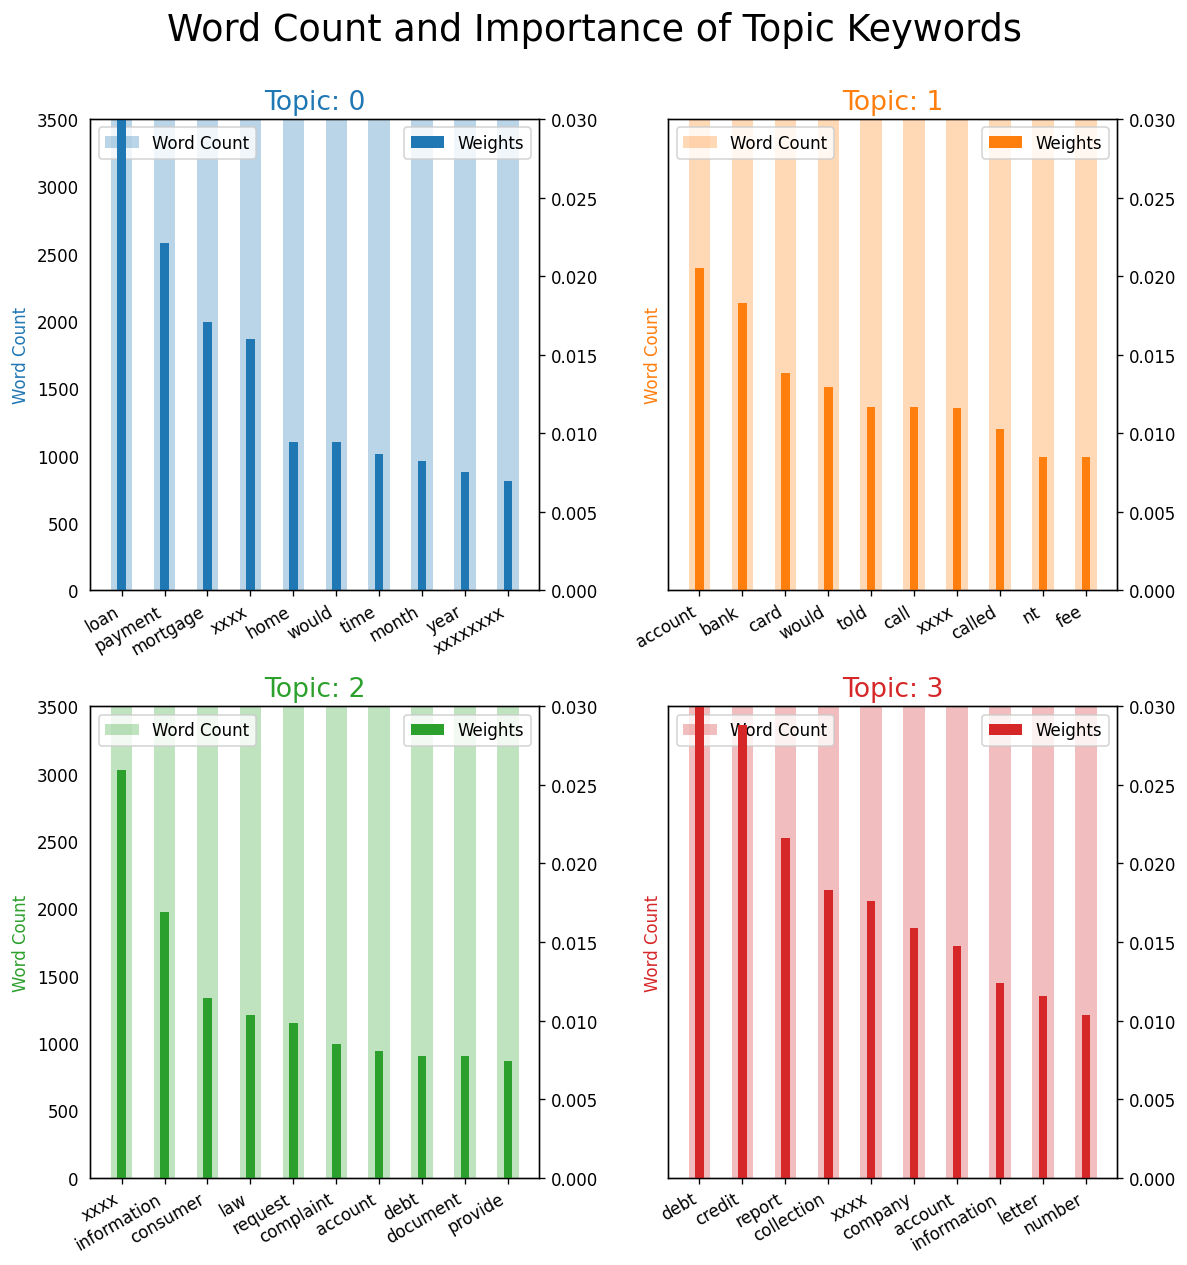

In [94]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharey=True, dpi=120)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
# fig.savefig('../images/topic_keywords.png')
plt.show()